# **Análise exploratória de Dados**

### Nerd dos Dados - **Insuficiência Cardiaca**

#### Informações do conjunto de dados

1 - Age: idade do paciente [anos]\
2 - Sex: sexo do paciente [M: Masculino, F: Feminino]\
3 - ChestPainType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]\
4 - ResgingBP: pressão arterial em repouso [mm Hg]\
5- Cholesterol: colesterol sérico [mm/dl]\
6- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]\
7 - ResgingECG: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]\
8 - MaxHR: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\
9 - ExercícioAngina: angina induzida por exercício [Y: Sim, N: Não]\
10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]\
11 - ST_Slope: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]\
12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]\

In [2]:
# Importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Carregando o arquivo CSV

df_original = pd.read_csv('heart.csv')

### **1° Avaliar o conjunto de dados de forma macro para compreeender os dados**

In [4]:
# Verificando as primeiras linhas do Dataframe

df_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [5]:
# Verificando as dimensões do arquivo (rows,columns)

df_original.shape

(918, 12)

In [6]:
# Verificando informações do arquivo 
# Parte importante para verificar os tipos de dados, se vamos transformar em dados categóricos ou não e etc

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### **2° Verificar se existe valores nulos (em branco) nos dados**

In [7]:
# Verificando se há valores nulos (dados missing)

df_original.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### **3° Verificar os valores únicos em cada variável**

In [8]:
# Total de valores únicos de cada variável
# Essa contagem é importante e ajuda a decidir se uma variável deve ser tratada como categórica ou numérica. Variáveis numéricas podem ser convertidas em categóricas para treinamento de modelos, análises de performance e cruzamentos de dados.
# Aqui vamos pegar as variaveis que tem poucos valores únicos e vamos plotar em gráficos

valores_unicos = []
for i in df_original.columns[0:12].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


### **4° Visualizar as medidas estatisticas principais do conjunto de dados**
#### Média(mean) | Mediana(50%) | Desvio Padrão(std) | Quartis(1° 25% | 2° 50% | 3° 75%) | Valores mínimos e máximos(min e max)

In [9]:
# Visualizando algumas medidas estatisticas

df_original.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


### **5° Avaliar as variaveis de forma individual através dos dados e gráficos para melhor entender os dados**
#### Utilizando alguns agrupamentos e alguns gráficos

In [10]:
# Quantidade de observações por Sexo

df_original.groupby(['Sex']).size()

Sex
F    193
M    725
dtype: int64

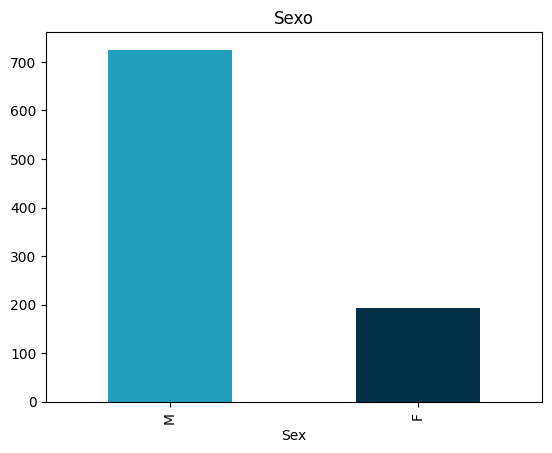

In [11]:
# Visualizando através do gráfico

df_original.Sex.value_counts().plot(kind='bar', title='Sexo', color= ['#219ebc', '#023047']);

In [12]:
# Quantidade de observações por Tipo de Dor Toraxica

df_original.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

<Axes: title={'center': 'ChestPainType'}, xlabel='ChestPainType'>

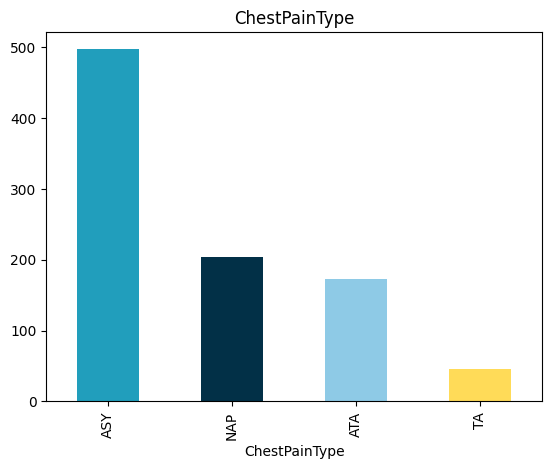

In [13]:
# Visualizando através do gráfico

df_original.ChestPainType.value_counts().plot(kind='bar', title='ChestPainType', color = ['#219ebc', '#023047', '#8ecae6', '#FFDB58'])

In [14]:
# Quantidade de observações por Glicemia e Jejum

df_original.groupby(['FastingBS']).size()

FastingBS
0    704
1    214
dtype: int64

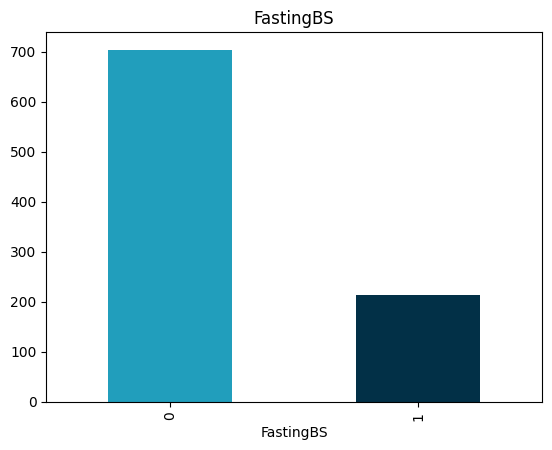

In [15]:
# Visualizando através do gráfico

df_original.FastingBS.value_counts().plot(kind='bar', title='FastingBS', color = ['#219ebc', '#023047']);

In [16]:
# Quantidade de observações por Resultados do eletrocardiograma em repouso

df_original.groupby(['RestingECG']).size()

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64

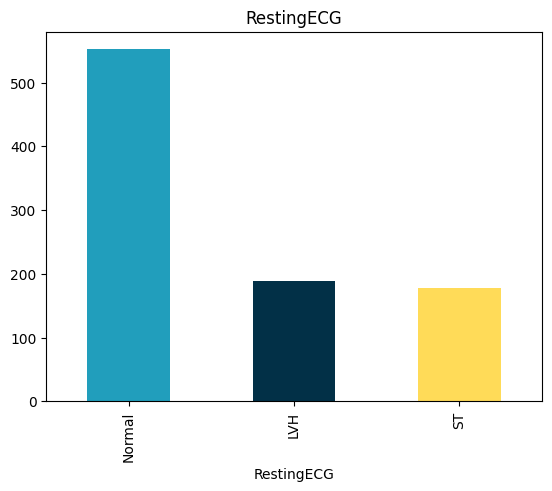

In [17]:
# Visualizando através do gráfico

df_original.RestingECG.value_counts().plot(kind='bar', title='RestingECG', color = ['#219ebc', '#023047', '#FFDB58']);

In [18]:
# Quantidade de observações por Angina Induzida

df_original.groupby(['ExerciseAngina']).size()

ExerciseAngina
N    547
Y    371
dtype: int64

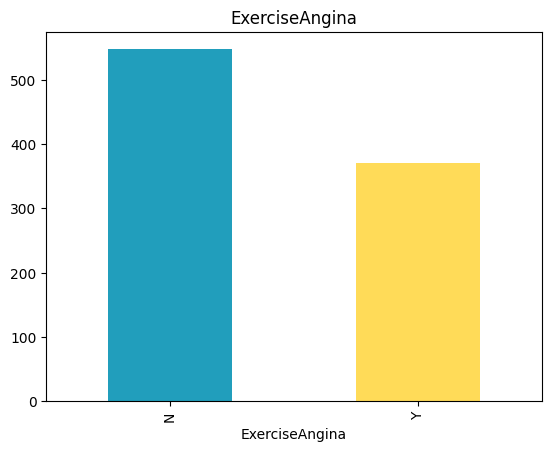

In [19]:
# Visualizando através do gráfico

df_original.ExerciseAngina.value_counts().plot(kind='bar', title='ExerciseAngina', color = ['#219ebc', '#FFDB58']);

In [20]:
# Quantidade de observações por Inclinação Pico Exercicio

df_original.groupby(['ST_Slope']).size()

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64

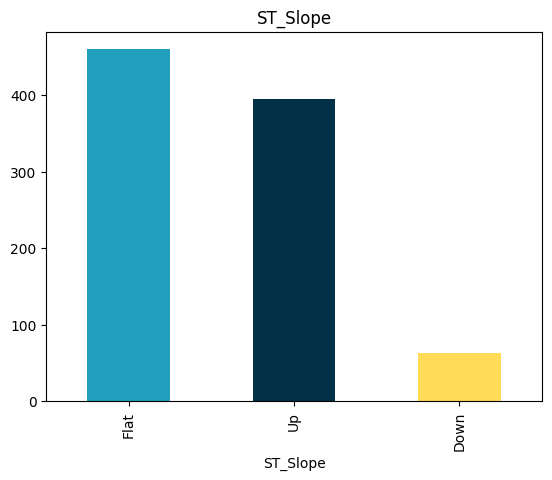

In [21]:
# Visualizando através do gráfico

df_original.ST_Slope.value_counts().plot(kind='bar', title='ST_Slope', color = ['#219ebc', '#023047', '#FFDB58']);

### **6° Avaliar o balanceamento da variável ALVO (Target)**

In [24]:
# Quantidade de observações Doença Cardiaca (Variavel TARGET)
# Verificar se a variavel alvo está balanciada, esse passo é importante para o aprendizado de maquina, pois se estiver desbalanceado ela vai aprender dessa forma. É necessário balancear.

df_original.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

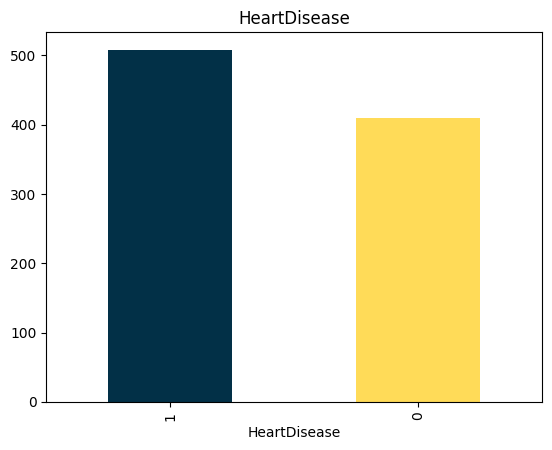

In [25]:
df_original.HeartDisease.value_counts().plot(kind='bar', title='HeartDisease', color = ['#023047', '#FFDB58']);

### **7° Analisar a relação de cada variável vs. variável alvo**

In [26]:
# Formatando o tamanho do plot 

plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True

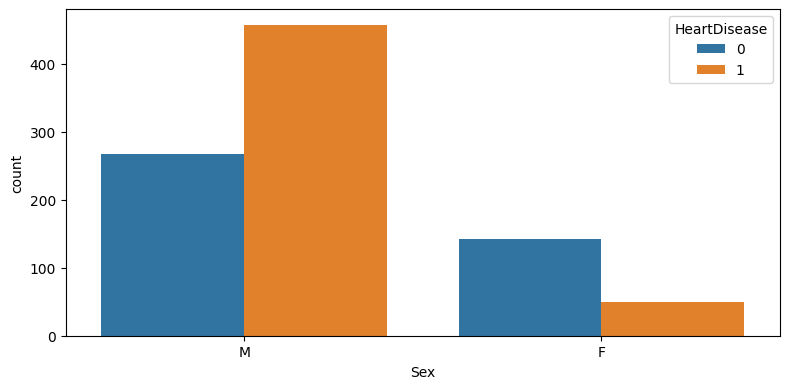

In [27]:
# Visualizando a Variável Sex x HeartDisease

sns.countplot(data = df_original, x = "Sex", hue = "HeartDisease")
plt.show()

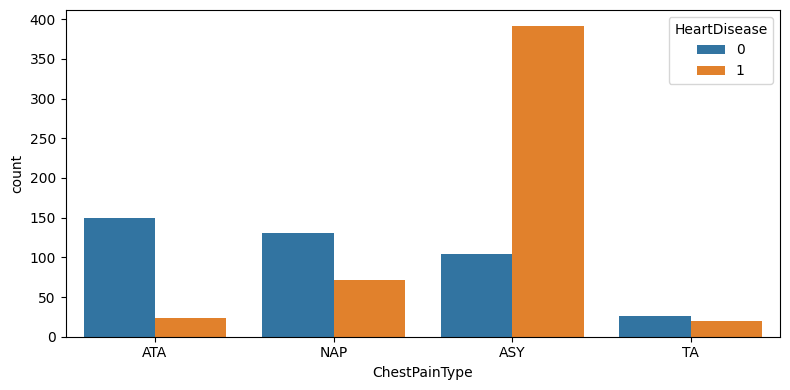

In [28]:
# Visualizando a variável ChestPainType x HeartDisease

sns.countplot(data = df_original, x = "ChestPainType", hue = "HeartDisease")
plt.show()

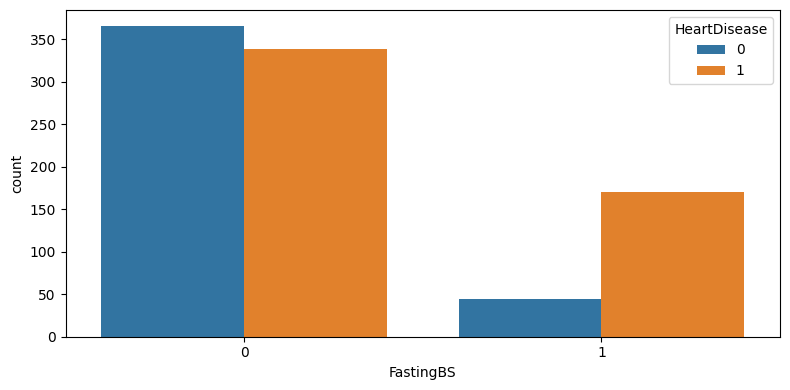

In [29]:
# Visualizando a variável FastingBS x HeartDisease

sns.countplot(data = df_original, x = "FastingBS", hue = "HeartDisease")
plt.show()

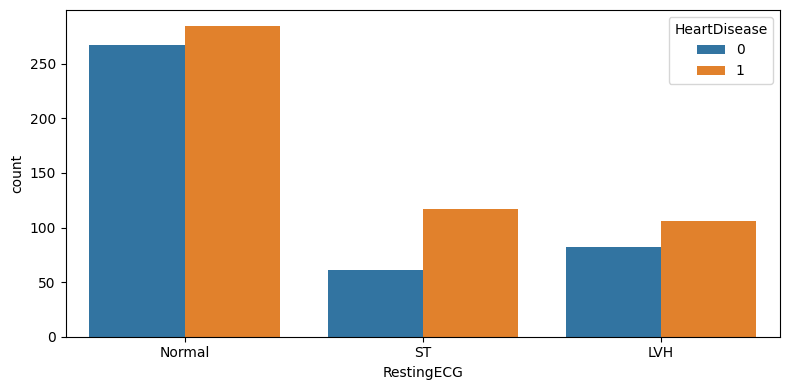

In [30]:
# Visualizando a variável RestingECG x HeartDisease

sns.countplot(data = df_original, x = "RestingECG", hue = "HeartDisease")
plt.show()

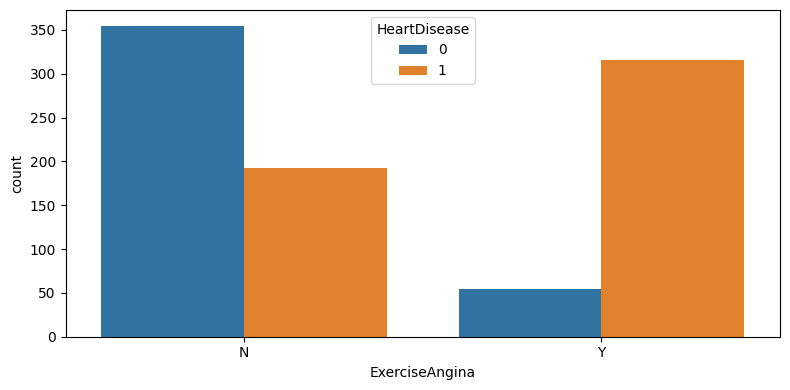

In [31]:
# Visualizando a variável ExerciseAngina x HeartDisease

sns.countplot(data = df_original, x = "ExerciseAngina", hue = "HeartDisease")
plt.show()

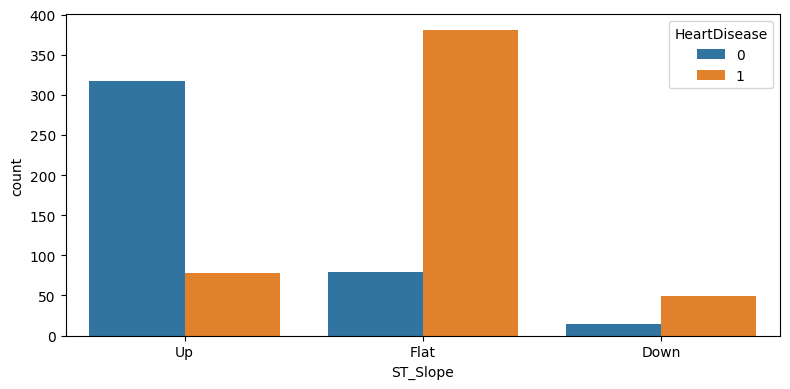

In [32]:
# Visualizando a variável ST_Slope x HeartDisease

sns.countplot(data = df_original, x = "ST_Slope", hue = "HeartDisease")
plt.show()

### **8° Analisar possíveis outliers**

In [33]:
# Carregar variaveis para plot

variaveis_numericas = []
for i in df_original.columns [0:11].tolist():
    if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [34]:
variaveis_numericas

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [35]:
len(variaveis_numericas)

6

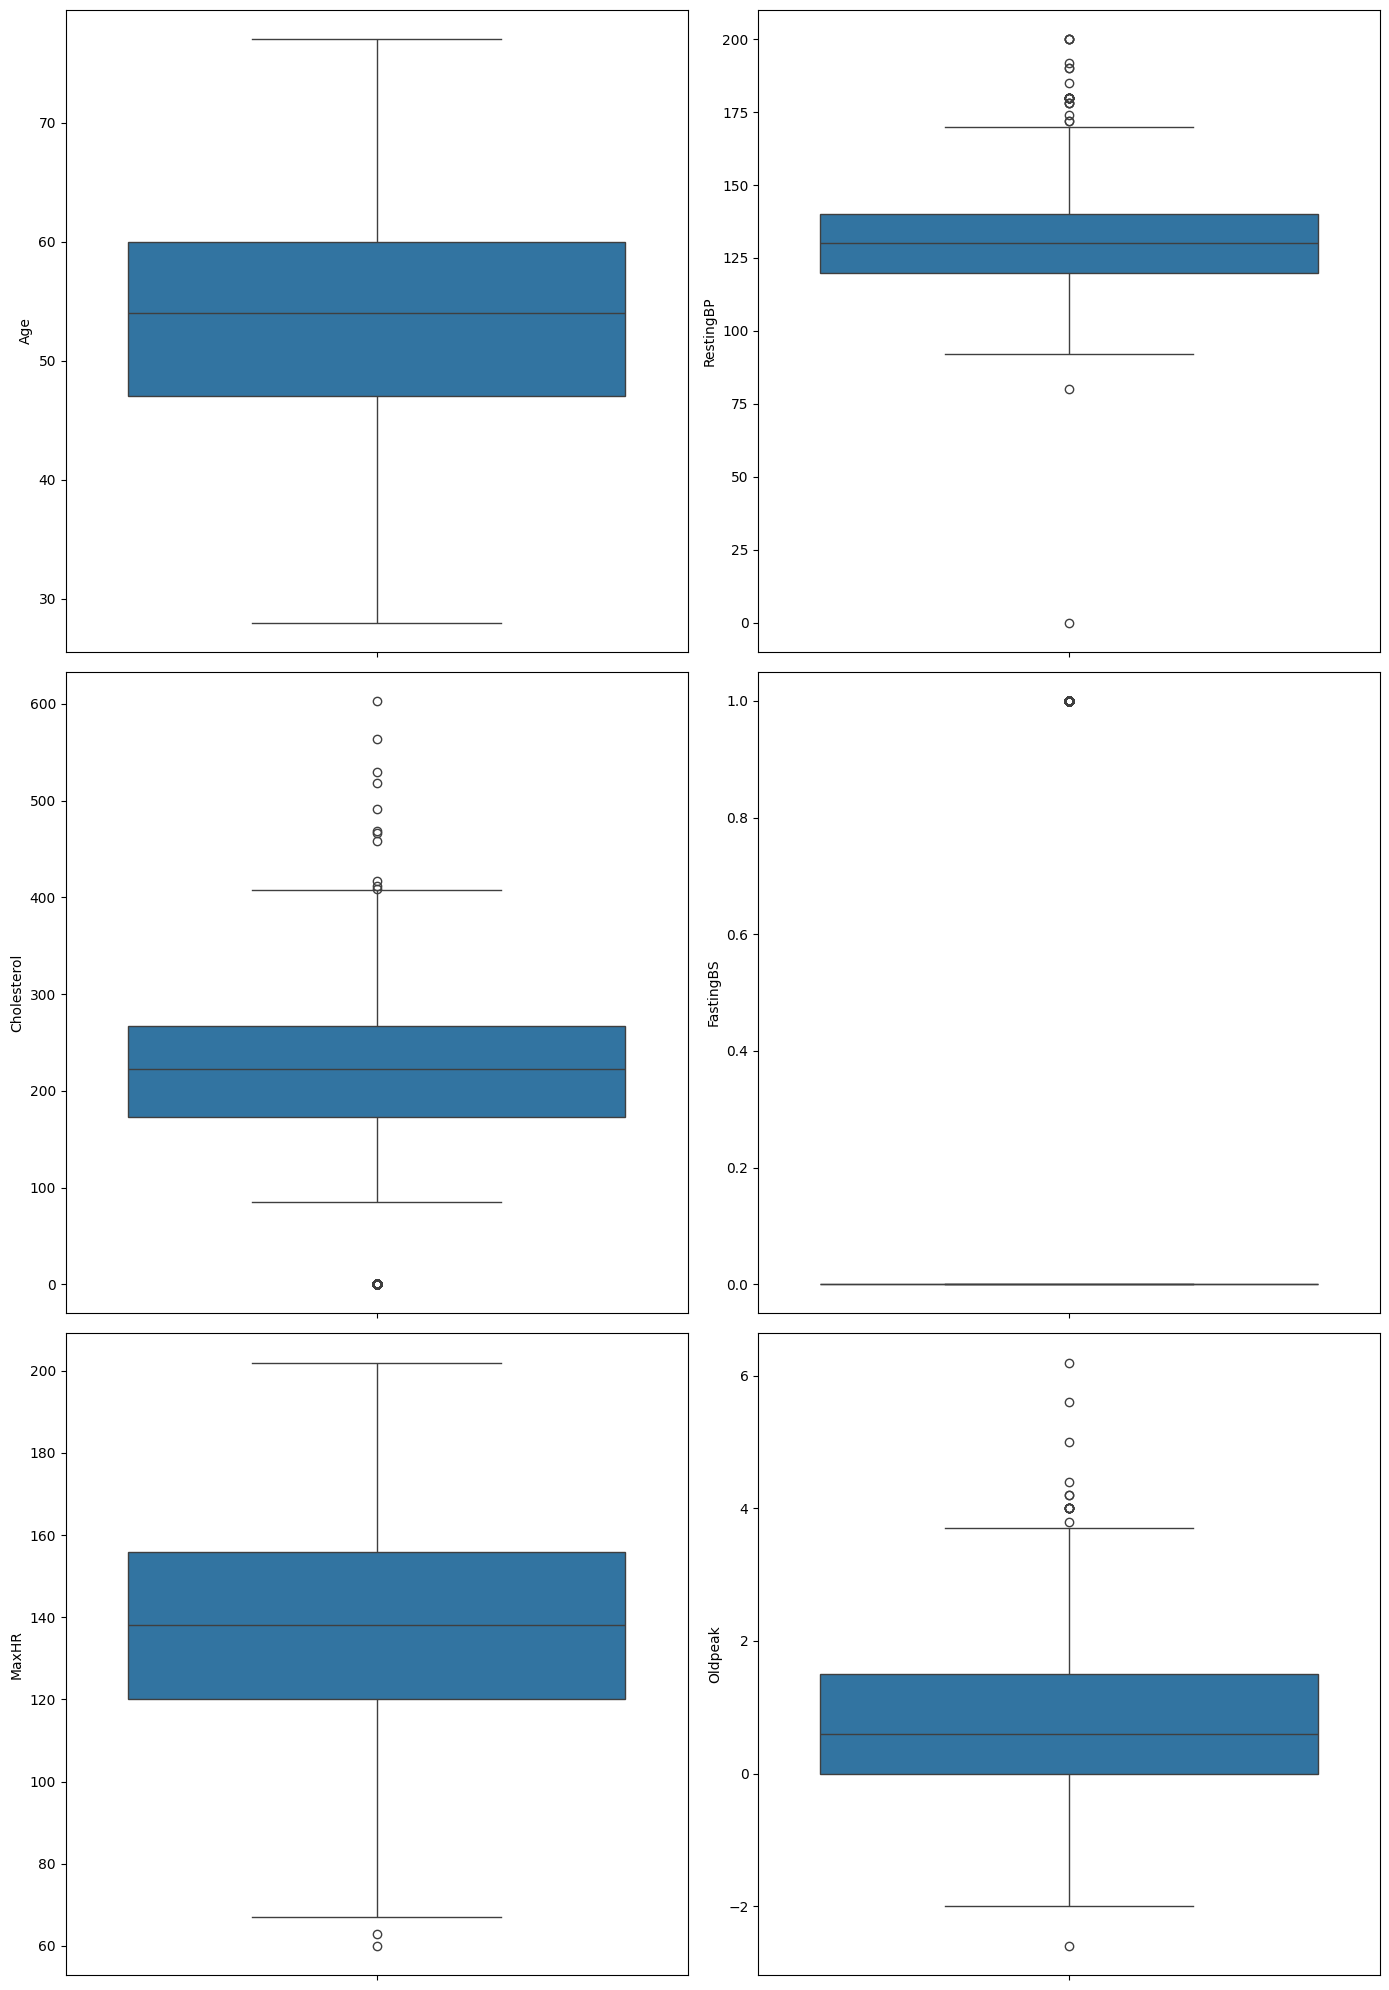

In [37]:
# Podemos observar nos boxplots abaixo que as variaveis númericas apresentam uma grande quantidade de "possiveis" outliers
# Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #Vai criar vários boxplot em 3 linhas e 2 colunas 

linha = 0
coluna = 0 
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

### **9° Analisar distribuição dos dados**

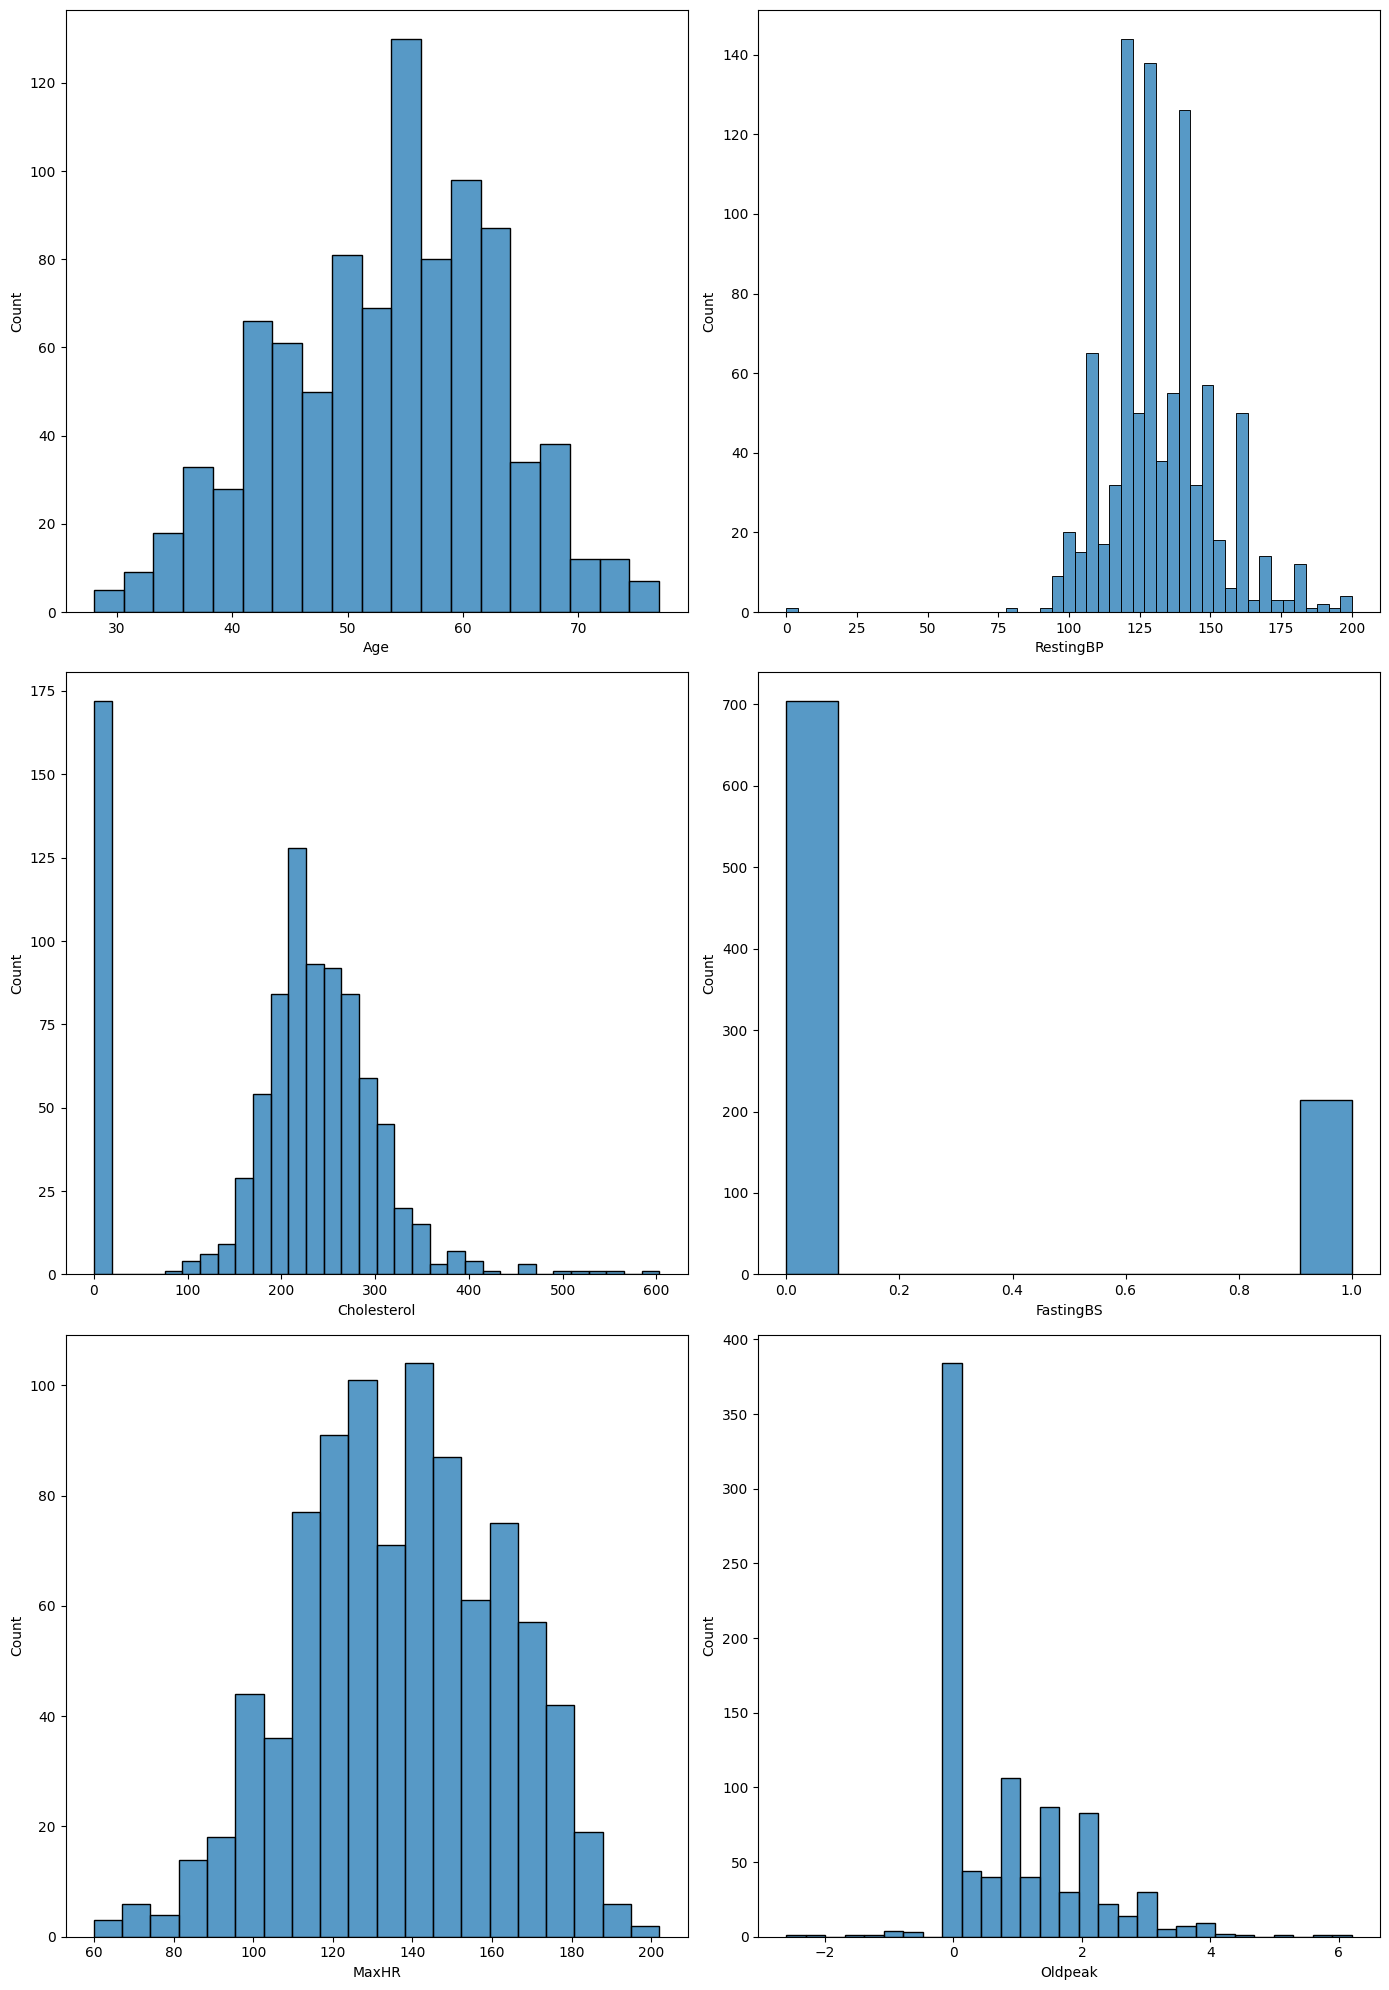

In [39]:
# Podemos observar no histograma abaixo que as variaveis númericas apresentam uma grande quantidade de "possiveis" outliers
# Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier
# Uma distribuição normal tem uma curva de sino

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #Vai criar vários boxplot em 3 linhas e 2 colunas 

linha = 0
coluna = 0 
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()